# Tutorial 6

**To complete the Activities and Tasks, please read all of the content we have provided.**
1. Introduction to Logistic Regression
2. What is Logistic Regression?
3. Why do we use Logistic Regression rather than Linear Regression?
4. Logistic Regression Algorithm
5. Logistic Regression with "scikit-learn"
6. Model Evaluation
7. Model Evaluation with "scikit-learn"
8. Read the comments in the code. They meant to explain some concept/information.

## Introduction to Logistic Regression

In the last tutorial, we practiced Linear Regression. Now, we will focus on **Logistic Regression** and try to understand what Logistic Regression is and how it differs from Linear Regression.

### What is Logistic Regression?

"**Logistic regression** is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables."

This is a formal definition of Logistic regression. We will try to understand what it means.

**Logistic Regression** is another statistical analysis method borrowed by Machine Learning. It is used when our dependent variable is dichotomous or **binary**. It just means a variable that has only 2 outputs, for example, A person will survive this accident or not, The student will pass this exam or not. The outcome can either be yes or no (2 outputs). This regression technique is similar to linear regression and can be used to predict the Probabilities for classification problems.


After reading the definition of logistic regression we now know that it is only used when our dependent variable is **binary** and in linear regression this dependent variable is **continuous**.

Logistic Regression is one of the basic and popular algorithms to solve a **classification** problem. It is named 'Logistic Regression' because its underlying technique is quite the same as Linear Regression. The term "Logistic" is taken from the Logit function that is used in this method of classification.

**What is the Classification Problem?**

We identify the problem as a classification problem when independent variables are continuous in nature and the dependent variable is in categorical form i.e. in classes like positive class and negative class. The real-life example of classification example would be, to categorize the mail as **spam** or **not spam**, to categorize the tumor as **malignant** or **benign**, and to categorize the transaction as **fraudulent** or **genuine**. All these problem's answers are in categorical form i.e. Yes or No. and that is why they are two-class classification problems.

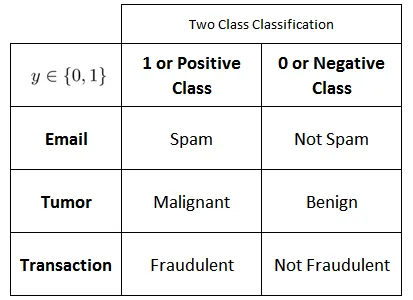

Although, sometimes we come across more than 2 classes, and still it is a classification problem. These types of problems are known as multi-class classification problems.

### Why do we use Logistic Regression rather than Linear Regression?

Suppose we have data on tumor size vs. its malignancy. As it is a classification problem, if we plot, we can see all the values will lie between 0 and 1. And if we fit the best-found regression line by assuming the **threshold** value is 0.5, we can do a reasonable job.

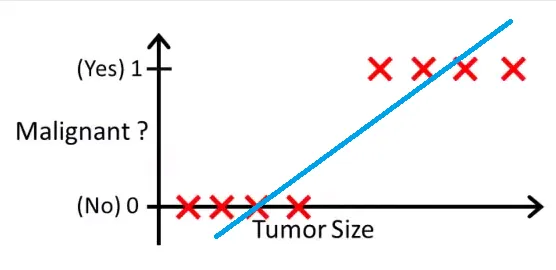

We can determine the point on the x-axis at which all the values lie to its left are considered to be of a negative class, and all the values lie to its right are of a positive class.

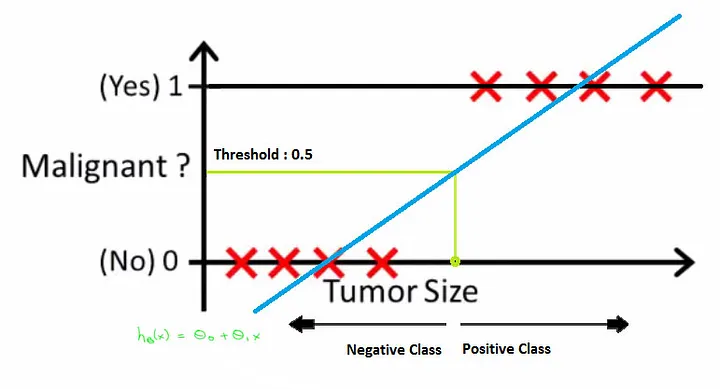

But what if there is an outlier in the data. Things would get pretty messy. For example, for 0.5 **thresholds**,

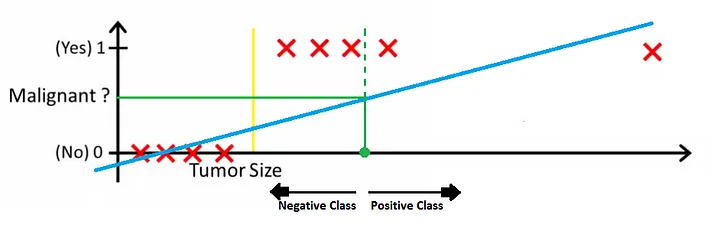

If we fit the best-found regression line, it still won't be enough to decide any point by which we can differentiate classes. It will put some positive class examples into negative class. The green dotted line (Decision Boundary) is dividing malignant tumors from benign tumors but the line should have been at a yellow line which is clearly dividing the positive and negative examples. So just a single outlier is disturbing the whole linear regression predictions. And that is where logistic regression comes into the picture.

### Logistic Regression Algorithm

As discussed earlier, to deal with outliers, Logistic Regression uses the **Sigmoid function**.

The **sigmoid function**, also called logistic function gives an 'S' shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0.

An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is a Sigmoid function, which takes any real value between zero and one. It is defined as

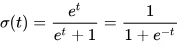

And if we plot it, the graph will be S curve,

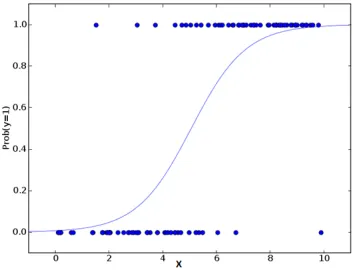

Let's consider `t` as a linear function in a univariate regression model.

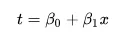

So the Logistic Equation will become

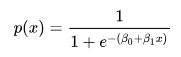

Now, when the logistic regression model comes across an outlier, it will take care of it.

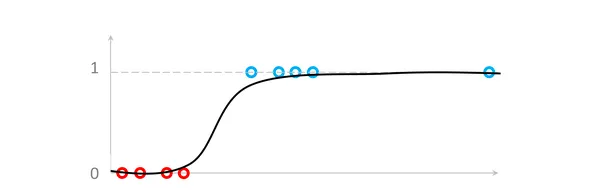

If the output of the sigmoid function is greater than the predefined **threshold** (usually 0.5 for binary classes), we can classify the outcome as 1 or YES. If it is less than the predefined threshold (0.5), we can classify it as 0 or NO. If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that a patient will have cancer.


But sometimes it will shift its y-axis to left or right depending on outliers' positions.

**To summarize**

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

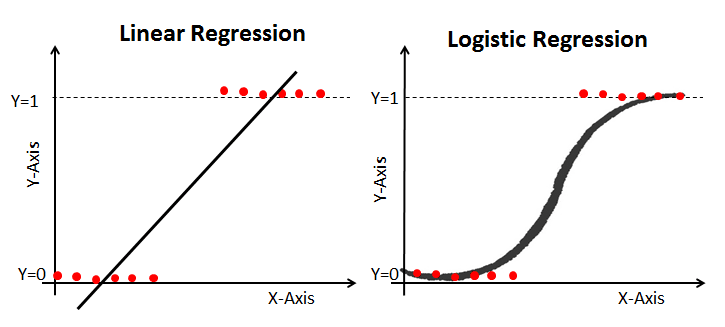

### Logistic Regression with "scikit-learn"

Let's build the diabetes prediction model using the `scikit-learn` library to perform logistic regression on the diabetes dataset.

We'll look into the structure of the diabetes dataset first.

You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database


**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict **whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Step1: Get the data**

In [3]:
fpath = 'data/'

In [4]:
#import pandas
import pandas as pd

# load dataset
diabetes = pd.read_csv(fpath+"input/diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step2: Selecting Feature**

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_cols] # Features
y = diabetes.Outcome # Target variable

**Step3: Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

**Step4: Model Development and Prediction**

First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, **fit** your model on the train set using `fit()` and perform prediction on the test set using `predict()`. 

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now let's understand what the model has predicted with two examples. One for outcome = 0, and another one for outcome = 1.

**Example1** where outcome = 0

In [8]:
# all the input features when outcome = 0
X_test[1:2]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
462,8,74,70,49,35.3,0.705,39


In [9]:
# actual outcome of the feature
y_test[1:2]

462    0
Name: Outcome, dtype: int64

In [10]:
# predicted outcome of the feature from the above model
y_pred[1:2]

array([0])

In [11]:
# probability of predicting either 0 or 1
logreg.predict_proba(X_test[1:2])

array([[0.7854111, 0.2145889]])

**Example2** where outcome = 1

In [12]:
# all the input features when outcome = 1
X_test[0:1]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
515,3,163,70,105,31.6,0.268,28


In [13]:
# actual outcome of the feature
y_test[0:1]

515    1
Name: Outcome, dtype: int64

In [14]:
# predicted outcome of the feature from the above model
y_pred[0:1]

array([1])

In [15]:
# probability of predicting either 0 or 1
logreg.predict_proba(X_test[0:1])

array([[0.48487393, 0.51512607]])

If you observe from the above example that when **Glucose = 163**, there is a chance of diabetes. Similarly, when **Glucose = 74**, there is no chance of diabetes. This is one way of understanding the features, outcome, and model. 

In example 1, there is a **21% (0.21)** probability that it could be diabetes. Similarly, in example 2, there is a **51% (0.51)** probability that it could be diabetes.


We can get the outcome and probabilities of all the data points with the below code. You can print and observe the values.

In [16]:
y_pred_all = logreg.predict(X)
y_pred_prob_all = logreg.predict_proba(X)

**The model has been created, and now it is time to assess it. How effective is our model?**

### Model Evaluation

Before moving on to model evaluation, we want to remind you how general machine learning works from the previous tutorial. The following picture depicts the general machine learning process.

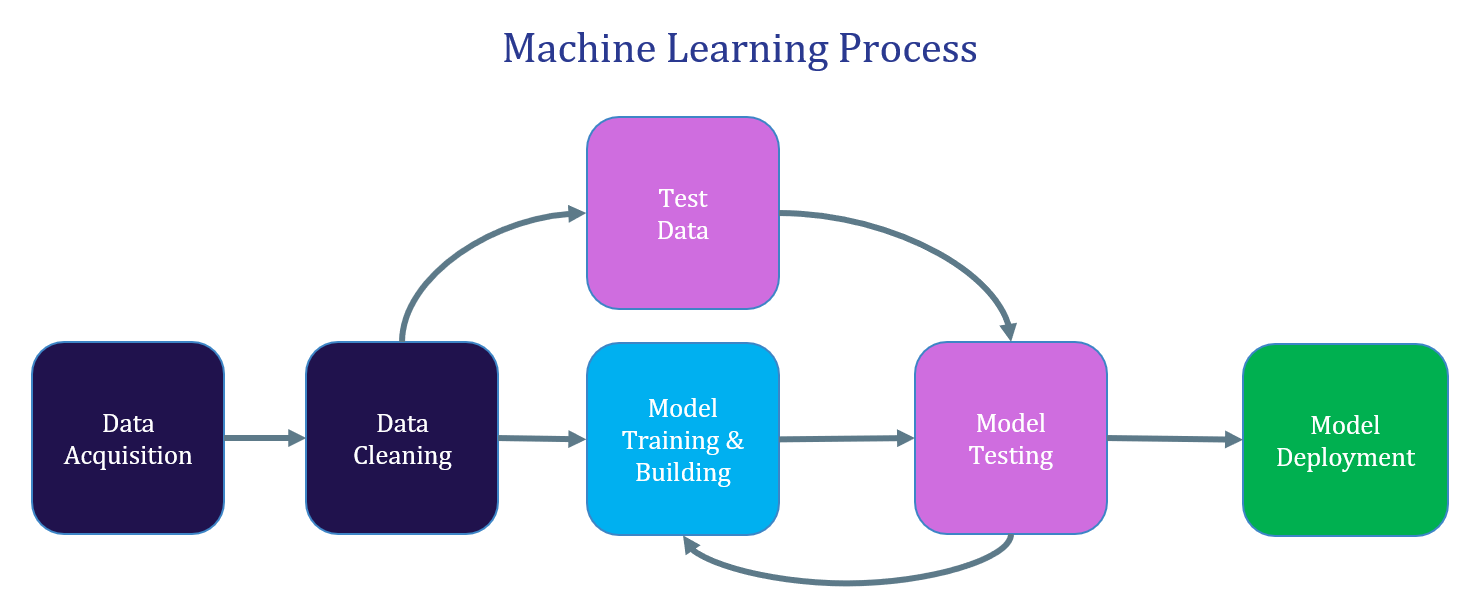

Let's take a moment now to discuss **evaluating** Logistic Regression Model.

In the last tutorial, we worked with Mean Absolute Error, Mean Squared Error, and Root Mean Square Error. These sorts of metrics aren't useful for logistic regression problems. We need metrics designed for categorical values!

Some of the most common evaluation metrics for logistic regression:
1.   Confusion Matrix (Precision, Recall, Accuracy and F1 Score)
2.   ROC Curve

Refer: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  for more details.

#### Confusion Matrix

First, we will try to understand the confusion matrix, which is the basis for the remaining metrics.

The `confusion_matrix` function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class. By definition, entry `i, j` in a confusion matrix is the number of observations actually in group `i`, but predicted to be in group `j`. 

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

**See the below example of a sample confusion matrix.**

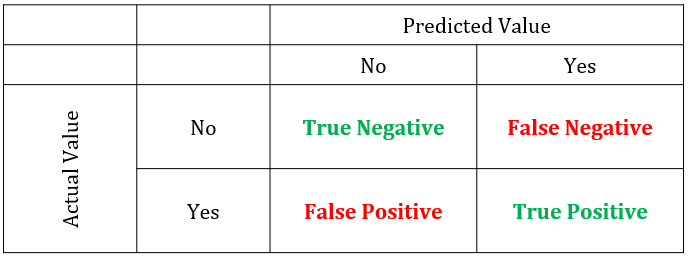

The confusion matrix can also be represented like below one. There is a direction change on the x and y axes. There is no restriction on using any kind of confusion matrix. Just focus on actual and predicted values.

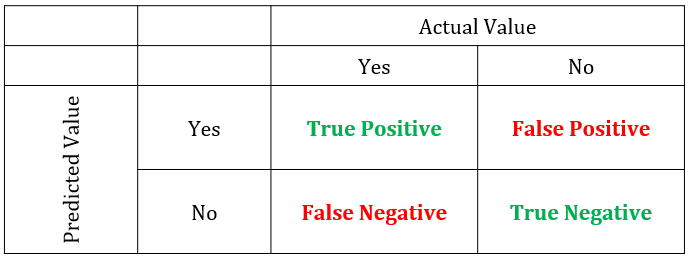

**Below is a funny example of Confusion Matrix**

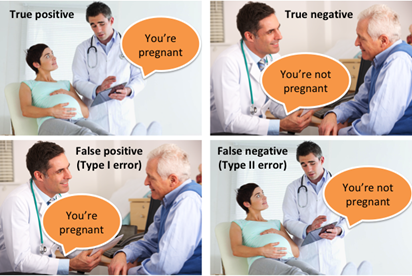

A **confusion matrix** is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

We have a confusion matrix in hand. Now, we will talk about **Precession** and **Recall**.

**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In the field of information retrieval, precision is the fraction of retrieved documents that are relevant to the query.

**Recall:** In information retrieval, recall is the fraction of the relevant documents that are successfully retrieved.

Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

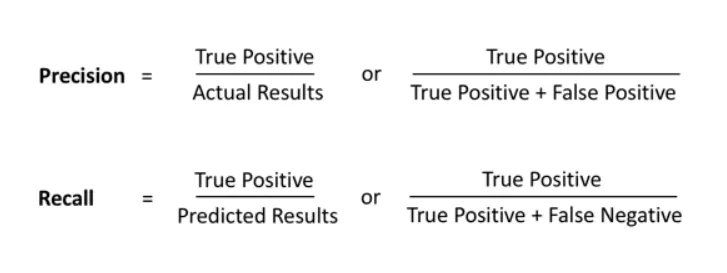

Below is another visulization to understand Confusion matrix, True Positive, Precision and Recall.

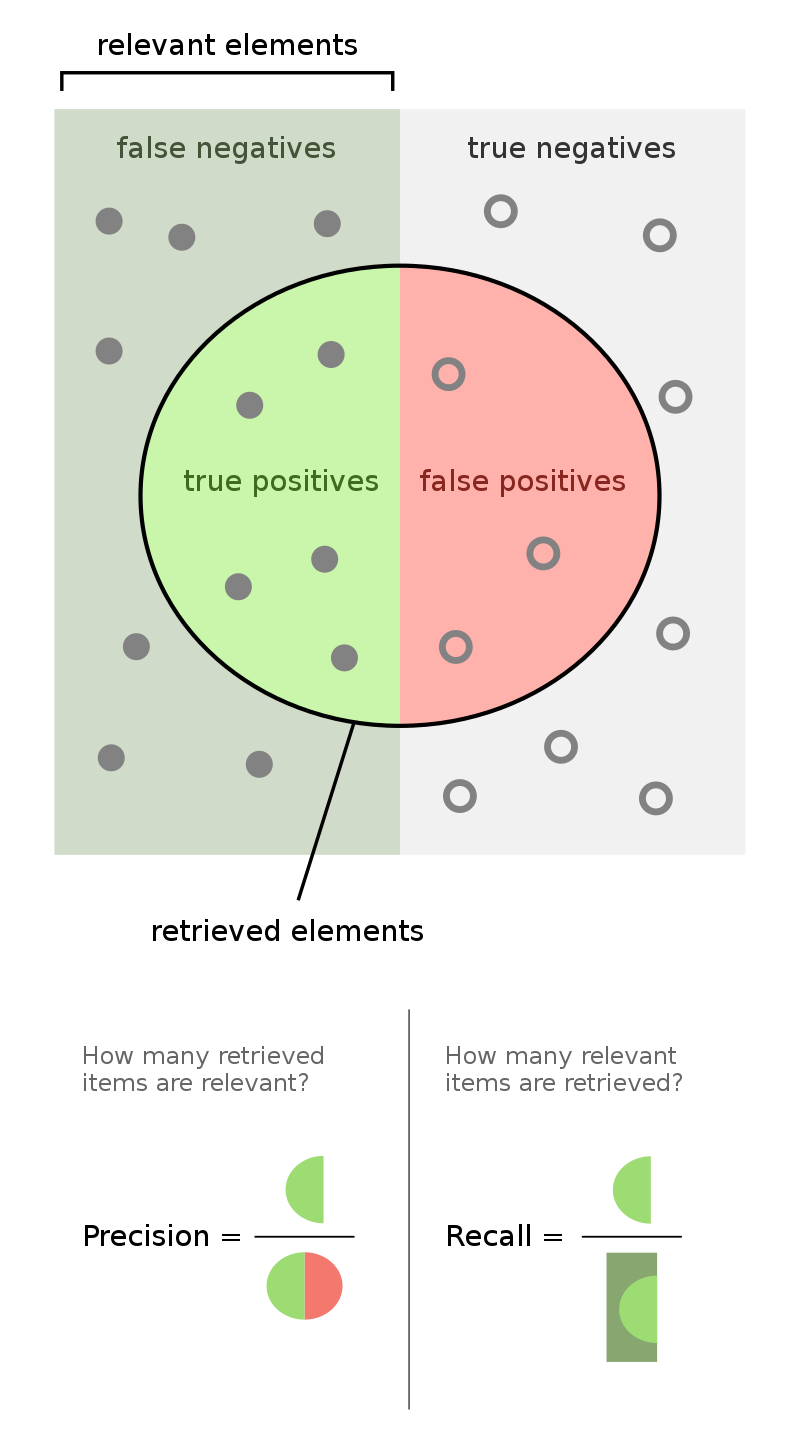

Now, we will talk about **Accuracy**.

**Accuracy** is the ratio of the total number of correct predictions and the total number of predictions.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

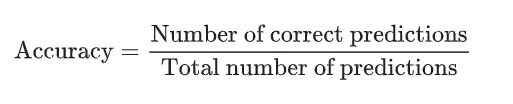

In other terms

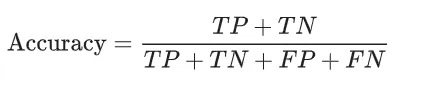

**F1-Score**

Finally we have the F1-score, which takes both precision and recall into account to ultimately measure the accuracy of the model. But what's the difference between this metric and accuracy? Well as we talked about in the beginning, false positives and false negatives can be absolutely crucial to the study, while true negatives are often less import to what ever problem we are trying to solve especially in a business setting. The F1 score tries to take this into account, giving more weight to false negatives and false positives while not letting large numbers of true negatives influence your score.

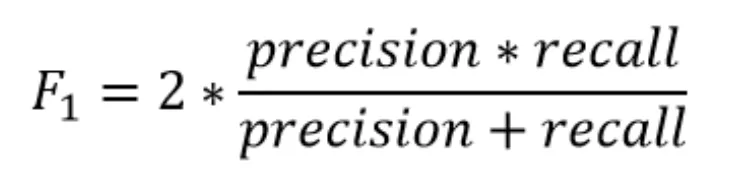

#### Confusion Matrix with "scikit-learn"

With the help of the `sklearn` library, we can calculate the above metrics.

**Confusion Matrix:**

In [17]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[115  10]
 [ 25  42]]


Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 43 are actual predictions, and 24 and 10 are incorrect predictions.

**Visualizing Confusion Matrix using Heatmap**

Let's visualize the results of the model in the form of a confusion matrix using plotly.

Here, you will visualize the confusion matrix using Heatmap.

In [18]:
import plotly.express as px
import plotly.figure_factory as ff

names = ['No(0)', 'Yes(1)']

fig = ff.create_annotated_heatmap(cnf_matrix, x=names, y=names, colorscale=px.colors.sequential.Viridis)

fig.update_layout(title='Diabetes Dataset Confusion Matrix',
                  autosize=False,
                  width=700,
                  height=500,
                  margin=dict(
                      t=150,
                      l=0,
                      r=0,
                      b=0,
                  ),
                  xaxis_title='Predicted Value',
                  yaxis_categoryorder='category descending',
                  yaxis_title='Actual Value')
fig.show()

In [19]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,115,10,125
1,25,42,67
All,140,52,192


The actual values are:

    The patients who actually don't have a diabetes = 125
    The patients who actually do have a diabetes = 67

The predicted values are:

    Number of patients who were predicted as not having a diabetes = 139
    Number of patients who were predicted as having a diabetes = 53

All the values we obtain above have a term. Let's go over them one by one:

    The cases in which the patients actually did not have diabetes and our model also predicted as not having it are called the True Negatives. For our matrix, True Negatives = 115.
    The cases in which the patients actually have diabetes and our model also predicted as having it are called the True Positives. For our matrix, True Positives = 43
    However, there are some cases where the patient actually has no diabetes, but our model has predicted that they do. This kind of error is the Type I Error, and we call the values False Positives. For our matrix, False Positives = 10
    Similarly, there are some cases where the patient actually has diabetes, but our model has predicted that he/she doesn't. This kind of error is a Type II Error, and we call the values False Negatives. For our matrix, False Negatives = 24

**Confusion Matrix Evaluation Metrics**

Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [20]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



**Accuracy:** Well, you got a classification rate of **82%**, considered as good accuracy.

**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have **81%** of the time.

**Recall:** If there are patients who have diabetes in the test set and your Logistic Regression model can identify it **64%** of the time.

#### ROC Curve

**ROC Curve:** Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

**False Positive Rate & True Negative Rate**

Along with the above terms, there are more values we can calculate from the confusion matrix:

**False Positive Rate (FPR):** 

It is the ratio of the False Positives to the Actual number of Negatives. In the context of our model, it is a measure of the number of cases where the model predicts that the patient has a diabetes from all the patients who actually didn't have the diabetes.

**True Negative Rate (TNR) or the Specificity:**

It is the ratio of the True Negatives and the Actual Number of Negatives. For our model, it is the measure of the number of cases where the model correctly predicts that the patient does not have diabetes from all the patients who actually didn't have diabetes. From these 2 definitions, we can also conclude that Specificity or TNR = 1 – FPR

We can also visualize Precision and Recall using ROC curves and PRC curves.

**Receiver Operating Characteristic Curve (ROC Curve)**

It is the plot between the TPR(y-axis) and FPR(x-axis). Since our model classifies the patient as having diabetes or not based on the probabilities generated for each class, we can decide the threshold of the probabilities as well.

For example, we want to set a threshold value of 0.4. This means that the model will classify the data point/patient as having diabetes if the probability of the patient having a diabetes is greater than 0.4. This will obviously give a high recall value and reduce the number of False Positives. Similarly, using the ROC curve, we can visualize how our model performs for different threshold values.

**Precision-Recall Curve (PRC)**

As the name suggests, this curve directly represents the precision (y-axis) and the recall (x-axis). If you observe our definitions and formulae for the Precision and Recall above, you will notice that we are not using the True Negatives(the actual number of people who don't have diabetes).

This is particularly useful for the situations where we have an imbalanced dataset and the number of negatives is much larger than the positives(or when the number of patients having no diabetes is much larger than the patients having it). In such cases, our greater concern would be detecting the patients with diabetes as correctly as possible and would not need the TNR.

#### ROC with "scikit-learn"

In [5]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        t=150,
        l=0,
        r=0,
        b=0,
    ))

fig.show()


AUC score for the case is 0.78. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0

<font color='red'> To conclude, we saw how to evaluate a classification model, especially focussing on precision and recall, and find a balance between them. Also, we explain how to represent our model performance using different metrics and a confusion matrix. </font>

### Activity-I

**In the Tutorial Completion Document, describe your findings.**

a. Fit/train the model with all the features of the data, including **`SkinThickness`** which is not included in the above demo.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# load dataset
diabetes = pd.read_csv(fpath+"input/diabetes.csv")

feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Outcome"]

X = diabetes[feature_cols]
Y = diabetes.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(y_pred)

y_pred_all = logreg.predict(X)
print(y_pred_all)

[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1 0 0 0 1]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [23]:
# To-do: Fit/train the model with all the features of the data, 
# including "SkinThickness" which is not included in the above demo.
print("To-do: \n")

To-do: 



**In the Tutorial Completion Document, describe your findings.**

b. Evaluate the above model. Then compare and discuss your findings with the demo model's results. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [4]:
# Use the model from previous step (Activity I.a)

# To-do: Evaluate the above model.
# Then compare and discuss your findings with the demo model's results.
# List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

print("To-do: \n")

import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import plotly.graph_objs as go

# Generate predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
precision = cm[1,1] / (cm[0,1] + cm[1,1])
recall = cm[1,1] / (cm[1,0] + cm[1,1])
f1_score = 2 * precision * recall / (precision + recall)

# Plot confusion matrix
fig = px.imshow(cm, labels=dict(x="Predicted", y="Actual"), x=[0, 1], y=[0, 1], color_continuous_scale="Blues")
fig.show()

# Plot metrics
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = accuracy,
    title = {"text": "Accuracy"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = precision,
    title = {"text": "Precision"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = recall,
    title = {"text": "Recall"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = f1_score,
    title = {"text": "F1 Score"},
    number={"valueformat": ".3f"},
))
fig.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, name="ROC Curve (AUC = {:.2f})".format(roc_auc)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], line=dict(dash="dash"), showlegend=False))
fig.update_layout(
    title="Receiver Operating Characteristic (ROC) Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()


To-do: 



## TASK I

For TASK I, we will use the new disease data set (Heart Attack Prediction Dataset)

**Heart Attack Prediction Dataset:**

You can download data from the following link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


**Context:**

This dataset contains information related to patients who have had heart attacks.

**Content:**

The datasets consists of several medical predictor variables and one target variable. Predictor variables includes the Age, Sex, cholestoral and resting blood pressure so on.

**In the Tutorial Completion Document, describe your findings.**

a. Fit/train the model with **`age, cp, trtbps, chol, thalachh`**

In [25]:
#import pandas
import pandas as pd

# load dataset
heart_attack = pd.read_csv(fpath+"input/heart.csv")
heart_attack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
# To-do: Fit/train the model with age, cp, trtbps, chol and thalachh features of the data.
print("To-do: \n")

# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset = pd.read_csv('data/input/heart.csv')

# Split the data into input and output variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train a decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Make predictions using both models
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE)
lin_mse = mean_squared_error(y_test, y_pred_lin)
tree_mse = mean_squared_error(y_test, y_pred_tree)

print("Linear Regression MSE:", lin_mse)
print("Decision Tree Regression MSE:", tree_mse)




To-do: 

Linear Regression MSE: 0.13099093857047345
Decision Tree Regression MSE: 0.21311475409836064


**In the Tutorial Completion Document, describe your findings.**

b. Evaluate the above model. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# load dataset
diabetes = pd.read_csv("data/input/diabetes.csv")

feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Outcome"]

X = diabetes[feature_cols]
y = diabetes.Outcome

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Define and train logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Generate predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig = px.imshow(cm, labels=dict(x="Predicted", y="Actual"), x=[0, 1], y=[0, 1], color_continuous_scale="Blues")
fig.show()

# Calculate metrics
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
precision = cm[1,1] / (cm[0,1] + cm[1,1])
recall = cm[1,1] / (cm[1,0] + cm[1,1])
f1_score = 2 * precision * recall / (precision + recall)

# Plot metrics
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = accuracy,
    title = {"text": "Accuracy"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = precision,
    title = {"text": "Precision"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = recall,
    title = {"text": "Recall"},
    number={"valueformat": ".3f"},
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = f1_score,
    title = {"text": "F1 Score"},
    number={"valueformat": ".3f"},
))
fig.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, name="ROC Curve (AUC = {:.2f})".format(roc_auc)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], line=dict(dash="dash"), showlegend=False))
fig.update_layout(
    title="Receiver Operating Characteristic (ROC) Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**In the Tutorial Completion Document, describe your findings.**

c. Fit/train the model with **`age, cp, trtbps, chol, thalachh and sex`**

In [28]:
#import pandas
import pandas as pd

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# To-do: Fit/train the model with age, cp, trtbps, chol, thalachh and sex features of the data.
print("To-do: \n")


# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
dataset = pd.read_csv('data/input/heart.csv')

# Split the data into input and output variables
X = dataset[['age', 'sex', 'cp', 'trtbps', 'chol', 'thalachh']].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train a decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Make predictions using both models
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE)
lin_mse = mean_squared_error(y_test, y_pred_lin)
tree_mse = mean_squared_error(y_test, y_pred_tree)

print("Linear Regression MSE:", lin_mse)
print("Decision Tree Regression MSE:", tree_mse)


To-do: 

Linear Regression MSE: 0.15822904528643086
Decision Tree Regression MSE: 0.26229508196721313


**In the Tutorial Completion Document, describe your findings.**

d. Evaluate the above model (TASK I.c). Then compare and discuss your findings with the model from TASK I.a. List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

In [7]:
# Use the model from previous step (TASK I.c)

# To-do: Evaluate the above model.
# Then compare and discuss your findings with the model from TASK I.a.
# List your observations. Plot the confusion matrix (Accuracy, Precesion, Recall and F1 Score) and ROC curve.

print("To-do: \n")


import plotly.graph_objs as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load the dataset
diabetes = pd.read_csv("data/input/diabetes.csv")

feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Outcome"]

X = diabetes[feature_cols]
y = diabetes.Outcome

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Train a logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = logreg.predict(X_test)

# Evaluate the model using confusion matrix, accuracy, precision, recall, and F1 score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    name='ROC curve (area = %0.2f)' % roc_auc))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines',
                    line=dict(dash='dash', color='gray'),
                    showlegend=False))
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')

fig.show()


To-do: 

Confusion Matrix:
[[125   0]
 [  0  67]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## References

1.   https://scikit-learn.org/stable/
2.   https://machinelearningmastery.com/
3.   https://pieriantraining.com/7-machine-learning-regression-algorithms-python/
4.   https://www.analyticsvidhya.com/blog/2022/12/analytics-vidhyas-top-10-machine-learning-blogs-in-2022/
5. https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/
6. https://www.datacamp.com/tutorial/understanding-logistic-regression-python
7. https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
8. https://www.datacamp.com/workspace/datasets
9. https://hatefdastour.github.io/notes/Statistical_Learning/Logistic_Regression.html
10. https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/?utm_source=blog&utm_medium=precision_and_recall
11. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
12. https://data.library.virginia.edu/logistic-regression-four-ways-with-python/

